In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os

In [3]:
import pathlib

data_dir = pathlib.Path("/home/theorist/Desktop/Programming/ML/computing_tools/capstone-1/")
data_dir = data_dir / "train" / "images"
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

1799

In [4]:
batch_size = 32
img_height = 200
img_width = 200

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale'  
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale' 
)

Found 1799 files belonging to 6 classes.
Using 1440 files for training.
Found 1799 files belonging to 6 classes.
Using 359 files for validation.


2025-09-25 11:21:53.183763: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Class names: {class_names}")
print(f"Number of classes: {num_classes}")

Class names: ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']
Number of classes: 6


In [7]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [16]:
# Model 1: Simple CNN
model_1 = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)), # 1 for grayscale channel

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_1.summary()

/home/theorist/Envs/ML-venv/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 200, 200, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 200, 200, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     5,120,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,144,198 (19.62 MB)

 Trainable params: 5,144,198 (19.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.1879 - loss: 1.8149 - val_accuracy: 0.3955 - val_loss: 1.2264
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.5806 - loss: 1.0106 - val_accuracy: 0.8106 - val_loss: 0.6188
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.7559 - loss: 0.6871 - val_accuracy: 0.8106 - val_loss: 0.5307
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.8503 - loss: 0.4189 - val_accuracy: 0.8914 - val_loss: 0.3358
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.9289 - loss: 0.2423 - val_accuracy: 0.8886 - val_loss: 0.3180
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.9013 - loss: 0.2541 - val_accuracy: 0.8579 - val_loss: 0.3587
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.9151 - loss: 0.2411 - val_accuracy: 0.8691 - val_loss: 0.3491
Epoch 8/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.9395 - loss: 0.1949 - val_accuracy: 0.

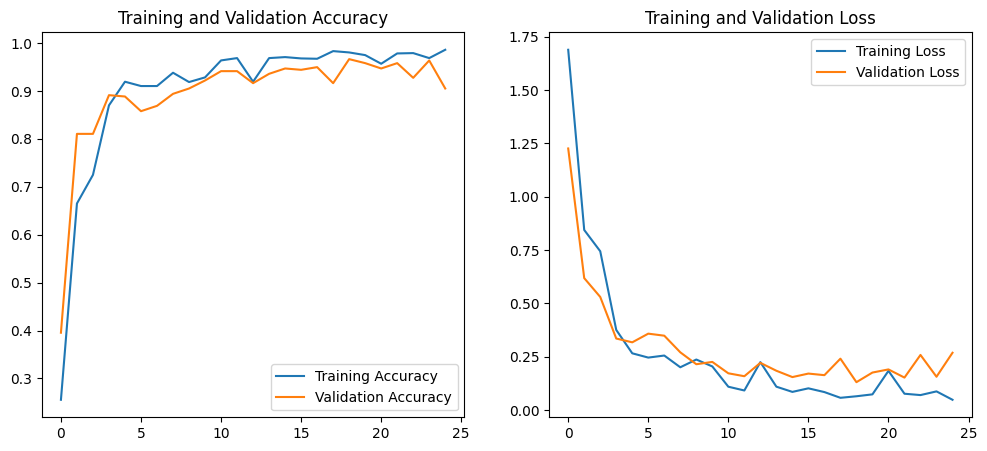

In [17]:
epochs = 25 
history = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

plot_history(history)

In [18]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 1)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

# Model 2: CNN with Augmentation and Dropout
model_2 = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2), # Dropout 20% of units

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 200, 200, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 200, 200, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 200, 200, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 100, 100, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     5,120,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,144,198 (19.62 MB)

 Trainable params: 5,144,198 (19.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 249ms/step - accuracy: 0.1927 - loss: 1.8005 - val_accuracy: 0.3872 - val_loss: 1.4763
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 248ms/step - accuracy: 0.4609 - loss: 1.3628 - val_accuracy: 0.5905 - val_loss: 1.0354
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 242ms/step - accuracy: 0.7044 - loss: 0.8429 - val_accuracy: 0.4067 - val_loss: 1.6757
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.7851 - loss: 0.5945 - val_accuracy: 0.5042 - val_loss: 2.0103
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.8459 - loss: 0.4287 - val_accuracy: 0.6490 - val_loss: 1.3938
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 257ms/step - accuracy: 0.8884 - loss: 0.3359 - val_accuracy: 0.6351 - val_loss: 1.4156
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - accuracy: 0.9263 - loss: 0.2202 - val_accuracy: 0.8774 - val_loss: 0.3315
Epoch 8/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - accuracy: 0.9067 - loss: 0.2592 - val_accu

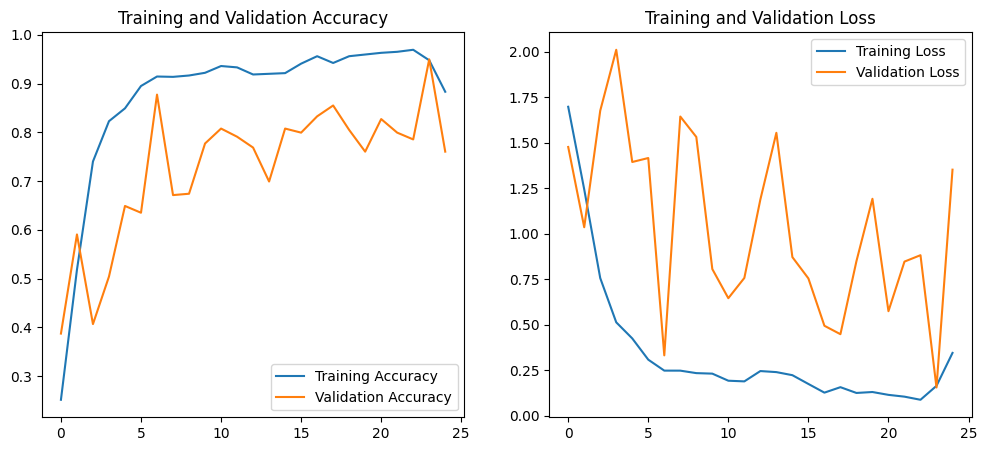

In [19]:
epochs = 25 
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

plot_history(history)

In [13]:
# Model 3: Fine tuning MobileNetV2
inputs = layers.Input(shape=(img_height, img_width, 1))

# Layer to convert grayscale to "pseudo-RGB" for the pre-trained model
x = layers.Conv2D(3, (1, 1), padding='same')(inputs)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False, # original clf is nto needed
    weights='imagenet'
)

# Freeze the base model
base_model.trainable = False
x = base_model(x, training=False)

# Add our custom clf head for thr 6 defects
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_3 = tf.keras.Model(inputs, outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_3.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_3.summary()

/tmp/ipykernel_24096/1794082147.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 200, 200, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 200, 200, 3)    │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,265,676 (8.64 MB)

 Trainable params: 7,692 (30.05 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

--- Starting Phase 1: Feature Extraction ---
Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 32s 673ms/step - accuracy: 0.4501 - loss: 1.2749 - val_accuracy: 0.8747 - val_loss: 0.5436
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 35s 788ms/step - accuracy: 0.8527 - loss: 0.5032 - val_accuracy: 0.8997 - val_loss: 0.4006
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 35s 787ms/step - accuracy: 0.9033 - loss: 0.3685 - val_accuracy: 0.9164 - val_loss: 0.3069
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 35s 787ms/step - accuracy: 0.9198 - loss: 0.2944 - val_accuracy: 0.9276 - val_loss: 0.2788
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 791ms/step - accuracy: 0.9196 - loss: 0.2610 - val_accuracy: 0.9248 - val_loss: 0.2359
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 789ms/step - accuracy: 0.9312 - loss: 0.2451 - val_accuracy: 0.9359 - val_loss: 0.2176
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 35s 788ms/step - accuracy: 0.9461 - loss: 0.1903 - val_accuracy: 0.9359 - val_loss: 0.1956
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 789ms/step

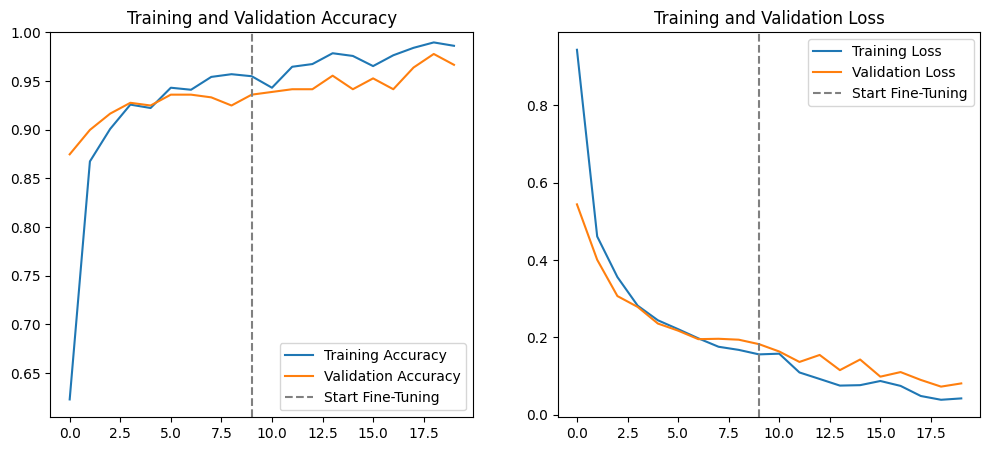

In [14]:
# PHASE 1
initial_epochs = 10
print("--- Starting Phase 1: Feature Extraction ---")
history_phase1 = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=initial_epochs
)

# PHASE 2

base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

for layer in base_model.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

optimizer_fine_tune = tf.keras.optimizers.Adam(learning_rate=1e-5)
model_3.compile(
    optimizer=optimizer_fine_tune,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
print("\n--- Starting Phase 2: Fine-Tuning ---")

fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_phase2 = model_3.fit(
    train_ds,
    epochs=total_epochs,
    initial_epoch=initial_epochs,
    validation_data=val_ds,
)

acc = history_phase1.history['accuracy'] + history_phase2.history['accuracy']
val_acc = history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy']

loss = history_phase1.history['loss'] + history_phase2.history['loss']
val_loss = history_phase1.history['val_loss'] + history_phase2.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([min(plt.ylim()), 1])
# Add a vertical line to show where fine-tuning started
plt.axvline(initial_epochs - 1, color='gray', linestyle='--', label='Start Fine-Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# Add a vertical line to show where fine-tuning started
plt.axvline(initial_epochs - 1, color='gray', linestyle='--', label='Start Fine-Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
# Model 4: Fine tuning EfficientNetB0
inputs = layers.Input(shape=(img_height, img_width, 1))

# Layer to convert grayscale to "pseudo-RGB" for the pre-trained model
x = layers.Conv2D(3, (1, 1), padding='same')(inputs)
base_model_effnet = tf.keras.applications.EfficientNetB0(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model
base_model_effnet.trainable = False
x = base_model_effnet(x, training=False)

# Add our custom clf head for thr 6 defects
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_4 = tf.keras.Model(inputs, outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_4.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_4.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step 


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 200, 200, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 200, 200, 3)    │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,057,263 (15.48 MB)

 Trainable params: 7,692 (30.05 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

--- Starting Phase 1: Feature Extraction ---
Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.2369 - loss: 1.7434 - val_accuracy: 0.5014 - val_loss: 1.3938
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.5271 - loss: 1.3486 - val_accuracy: 0.6825 - val_loss: 1.1295
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6136 - loss: 1.1761 - val_accuracy: 0.6964 - val_loss: 0.9939
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.6361 - loss: 1.0397 - val_accuracy: 0.7688 - val_loss: 0.9087
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.6522 - loss: 0.9786 - val_accuracy: 0.7911 - val_loss: 0.8373
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.6680 - loss: 0.9310 - val_accuracy: 0.8134 - val_loss: 0.7693
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7128 - loss: 0.8738 - val_accuracy: 0.8134 - val_loss: 0.7283
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7286 - lo

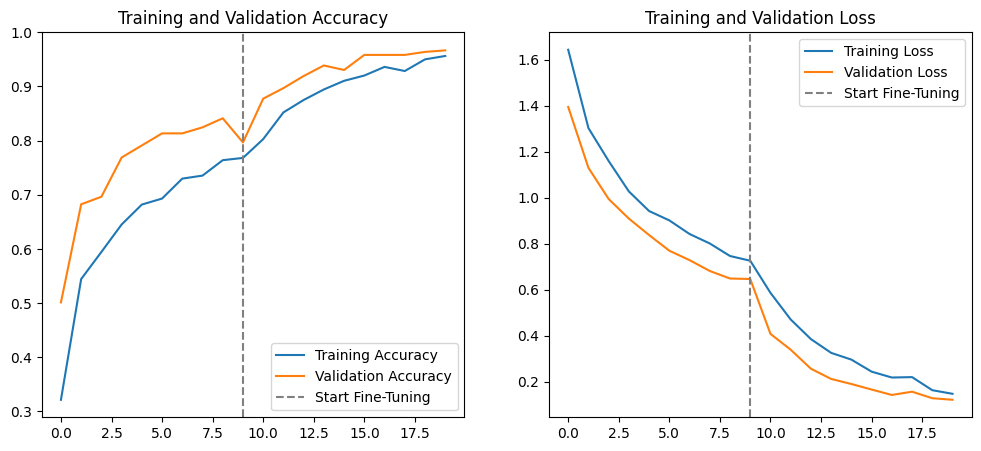

In [24]:
# PHASE 1
initial_epochs = 10
print("--- Starting Phase 1: Feature Extraction ---")
history_phase1 = model_4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=initial_epochs
)

# PHASE 2

base_model_effnet.trainable = True
fine_tune_at = 100
for layer in base_model_effnet.layers[:fine_tune_at]:
  layer.trainable = False

for layer in base_model_effnet.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

optimizer_fine_tune = tf.keras.optimizers.Adam(learning_rate=1e-5)
model_4.compile(
    optimizer=optimizer_fine_tune,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
print("\n--- Starting Phase 2: Fine-Tuning ---")

fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_phase2 = model_4.fit(
    train_ds,
    epochs=total_epochs,
    initial_epoch=initial_epochs,
    validation_data=val_ds,
)

acc = history_phase1.history['accuracy'] + history_phase2.history['accuracy']
val_acc = history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy']

loss = history_phase1.history['loss'] + history_phase2.history['loss']
val_loss = history_phase1.history['val_loss'] + history_phase2.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([min(plt.ylim()), 1])
# Add a vertical line to show where fine-tuning started
plt.axvline(initial_epochs - 1, color='gray', linestyle='--', label='Start Fine-Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# Add a vertical line to show where fine-tuning started
plt.axvline(initial_epochs - 1, color='gray', linestyle='--', label='Start Fine-Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
model_3.save('steel_defect_clf_mobile_netv2_fine_tuning.keras')

In [20]:
model_1.save('steel_defect_clf_simple_cnn.keras')

In [21]:
model_2.save('steel_defect_clf_simple_cnn_with_reg.keras')

In [ ]:
model_4.save('')

In [22]:
!ls

'steel defect clf.ipynb'
 steel_defect_clf_mobile_netv2_fine_tuning.keras
 steel_defect_clf_simple_cnn.keras
 steel_defect_clf_simple_cnn_with_reg.keras


In [ ]:
import pickle

with open('artifacts/history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [8]:
model_mbnv2 = tf.keras.models.load_model("steel_defect_clf_mobile_netv2_fine_tuning.keras")

In [11]:
predictions = model_mbnv2.predict(val_ds)
y_pred = np.argmax(predictions, axis=1)
y_true = np.concatenate([y for x, y in val_ds], axis=0)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step


2025-09-25 11:24:14.666748: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
                 precision    recall  f1-score   support

        crazing       1.00      0.94      0.97        52
      inclusion       0.95      0.93      0.94        75
        patches       0.95      1.00      0.97        56
 pitted_surface       1.00      0.93      0.96        59
rolled-in_scale       1.00      1.00      1.00        61
      scratches       0.92      1.00      0.96        56

       accuracy                           0.97       359
      macro avg       0.97      0.97      0.97       359
   weighted avg       0.97      0.97      0.97       359



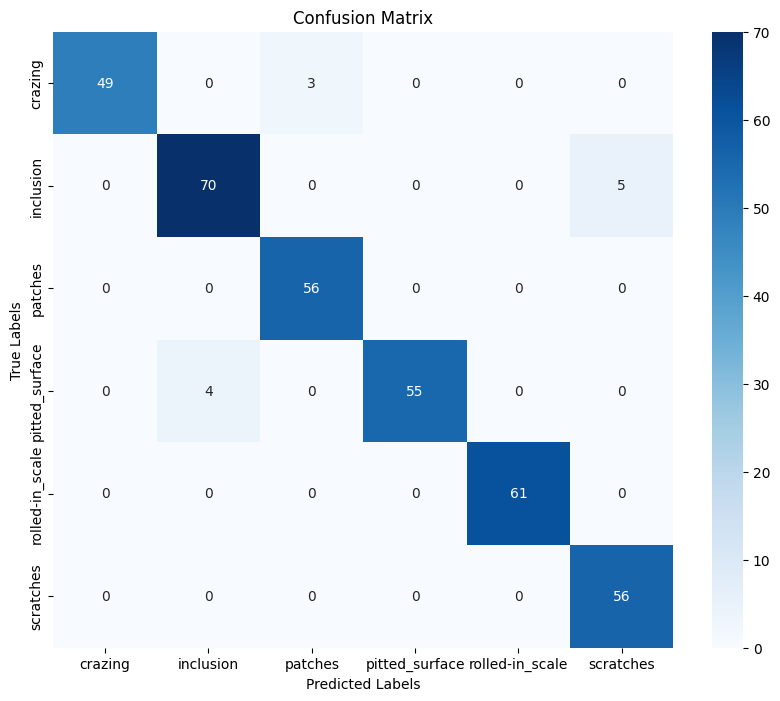

In [15]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()